In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json

## Reading in the data
I have the data saved in individual json files for each doctor. So here I am constructing a NetworkX based by creating a link between the doctor's ID number and each of the institutions they trained at or hospitals they are affiliated with. I want to add edge attributes for the years they attended each institution and whether it was undergrad/MD/residency/fellowship and node attributes for where they currently are and their job title, specialty, sub-specialty and awards.

In [2]:
i = -1
G = nx.Graph()
edge_count = 0
institutions = set()
# hospitals = set()
errors = 0
while i <= 38970: # total number of files
    i = i + 1 # increment counter
    try:
        filepath = '../../physician_trajectories/data/card/' + str(i) + '.json' # construct filepath
        with open(filepath, 'r') as f:
            data = json.load(f) # load json as dict
            if data.get(str(i)).get('training'):
                for keys, vals in data.get(str(i)).get('training').items(): # iterate through 'training'
                    institutions.add(list(vals.keys())[0]) # add institution to set
                    G.add_edge(i, list(vals.keys())[0]) # create edge between doctor id and institution
                for line in data.get(str(i)).get('hospital'):
                    institutions.add(line) # add hospital to set
                    G.add_edge(i, line) # create edge between doctor and hospital
    except Exception as e:
        errors = errors + 1


## Degree distribution
The degree distribution of the whole cardiology network seems to follow a power law but I need to fit it to say whether its 'scale-free' or not. This is the whole network including doctors and institutions so I think that's why theres a weird hump near at low degrees because I think the doctors degrees will probably follow more of a poisson distribution but the institutions might be scale free, but here we're getting the amalgamation of both.

In [3]:
def degree_distribution(G, number_of_bins=15, log_binning=True, density=True, directed=False):
    """
    Given a degree sequence, return the y values (probability) and the
    x values (support) of a degree distribution that you're going to plot.

    Parameters
    ----------
    G (nx.Graph):
        the network whose degree distribution to calculate

    number_of_bins (int):
        length of output vectors

    log_binning (bool):
        if you are plotting on a log-log axis, then this is useful

    density (bool):
        whether to return counts or probability density (default: True)
        Note: probability densities integrate to 1 but do not sum to 1.

    directed (bool or str):
        if False, this assumes the network is undirected. Otherwise, the
        function requires an 'in' or 'out' as input, which will create the
        in- or out-degree distributions, respectively.

    Returns
    -------
    bins_out, probs (np.ndarray):
        probability density if density=True node counts if density=False; binned edges

    """

    # Step 0: Do we want the directed or undirected degree distribution?
    if directed:
        if directed == 'in':
            k = list(dict(G.in_degree()).values())  # get the in degree of each node
        elif directed == 'out':
            k = list(dict(G.out_degree()).values())  # get the out degree of each node
        else:
            out_error = "Help! if directed!=False, the input needs to be either 'in' or 'out'"
            print(out_error)
            # Question: Is this the correct way to raise an error message in Python?
            #           See "raise" function...
            return out_error
    else:
        k = list(dict(G.degree()).values())  # get the degree of each node

    # Step 1: We will first need to define the support of our distribution
    kmax = np.max(k)  # get the maximum degree
    kmin = 0  # let's assume kmin must be 0

    # Step 2: Then we'll need to construct bins
    if log_binning:
        # array of bin edges including rightmost and leftmost
        bins = np.logspace(0, np.log10(kmax + 1), number_of_bins + 1)
    else:
        bins = np.linspace(0, kmax + 1, num=number_of_bins + 1)

    # Step 3: Then we can compute the histogram using numpy
    probs, _ = np.histogram(k, bins, density=density)

    # Step 4: Return not the "bins" but the midpoint between adjacent bin
    #         values. This is a better way to plot the distribution.
    bins_out = bins[1:] - np.diff(bins) / 2.0

    return bins_out, probs

In [6]:
%pwd

'/Users/nima/PycharmProjects/PhD/physician_trajectories/code'

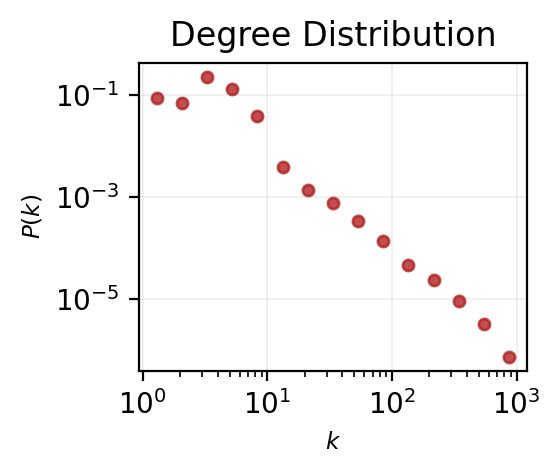

In [8]:

x, y = degree_distribution(G)
fig, ax = plt.subplots(1,1,figsize=(2.5,2),dpi=200)

ax.loglog(x, y,'o', color='firebrick', alpha=0.8,  ms = 4)

ax.set_xlabel(r"$k$",fontsize='small')
ax.set_ylabel(r"$P(k)$",fontsize='small')
ax.grid(linewidth=0.7, color='#999999', alpha=0.15, linestyle='-')
ax.set_title('Degree Distribution')
plt.savefig('../figs/degree_dist.pdf', dpi=425, bbox_inches='tight')
plt.savefig('../figs/degree_dist.png', dpi=425, bbox_inches='tight')

In [ ]:
# i=4
i = 19
filepath = '../../NETS 5116 project/data/card/' + str(i) + '.json' # construct filepath
with open(filepath, 'r') as f:
    data = json.load(f) # load json as dict

# for keys, vals in data.get(str(i)).get('training').items(): # iterate through 'training'
#     institutions.add(list(vals.keys())[0]) # add institution to set
#     G.add_edge(i, list(vals.keys())[0]) # create edge between doctor id and institution

# for line in data.get(str(i)).get('hospital'):
#     institutions.add(line) # add hospital to set
#     G.add_edge(i, line) # create edge between doctor and hospital

In [ ]:
for keys, vals in data.get(str(i)).get('training').items(): # iterate through 'training'
    print(list(vals.keys())[0]) # add institution to set
    print(list(vals.values())[0])
    for line in list(vals.values())[0]:
        if 'class' in line.lower()
            level = 'MD'
            topic = None
            start = int(line.split()[-1]) - 4
            end = int(line.split()[-1])

    #G.add_edge(i, list(vals.keys())[0]) # create edge between doctor id and institution

In [ ]:
print(nx.number_connected_components(G))
print(nx.transitivity(G))
print(len(institutions))
# print(len(hospitals)) theres some overlap between hospitals and institutions - about 400 